## 勾配降下法(Gradient Descent)

* パラメータの$\alpha$, $\epsilon$が入力値として与えられる。つまり両者はハイパーパラメータ
* 初期点${\bf x}_{k}$を決める
* $k$を0から1つずつ増やしながら以下を繰り返す
    1. $\| {\nabla} f({\bf x}_{k}) \| \le \epsilon$ であれば終了
    2. ${\bf x}_{k+1} = {\bf x}_{k} - \alpha \nabla f({\bf x}_{k})$ を計算する

In [13]:
import numpy as np

class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        # L2ノルムがeps以下であれば終了
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

ここでは以下のような制約条件のない場合の最適化問題を考えることとする
$$
Minimize\ f(x, y) = 5x^2 - 6xy +3y^2 + 6x - 6y
$$
ここで$f(x, y)$を偏微分すると
$$
\nabla f =
\begin{pmatrix}
\frac {\partial f}{\partial x} \\
\frac {\partial f}{\partial y}
\end{pmatrix}
=
\begin{pmatrix}
10x - 6y + 6 \\
-6x + 6y - 6
\end{pmatrix}
$$

In [14]:
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5*x**2 - 6*x*y + 3*y**2 + 6*x - 6*y

In [15]:
def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10*x - 6*y + 6, -6*x + 6*y - 6])

[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


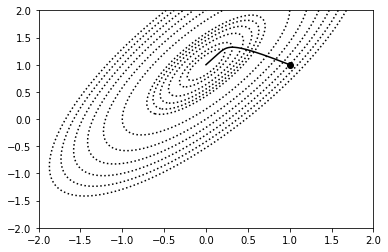

In [16]:
import numpy as np
import matplotlib.pyplot as plt

algo = GradientDescent(f, df)
initial = np.array([1, 1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

plt.scatter(initial[0], initial[1], color="k", marker="o")

# 以下で収束までの点の移動を描画。黒丸が初期値。
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color="k", linewidth=1.5)

# 以下で等高線を作図
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]
plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels,
            colors="k", linestyles="dotted")


### $\alpha$を変えた場合

/home/kakehi/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
/home/kakehi/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/home/kakehi/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract


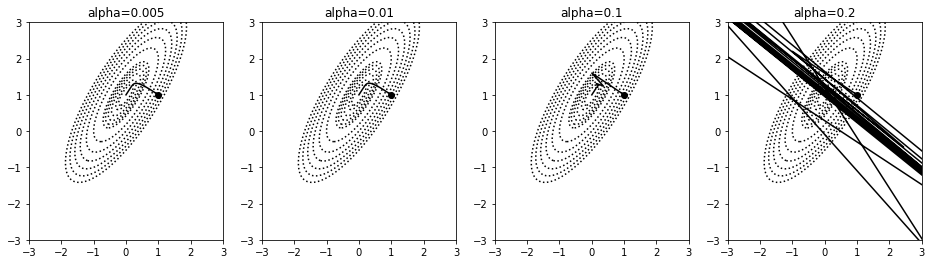

In [26]:
xmin, xmax, ymin, ymax = -3, 3, -3, 3

algos = []
initial = np.array([1, 1])
alphas = [0.005, 0.01, 0.1, 0.2]

for alpha in alphas:
    algo = GradientDescent(f, df, alpha=alpha)
    algo.solve(initial)
    #algo.solve(np.array(initial))
    algos.append(algo)
    
xs = np.linspace(xmin, xmax, 300)
ys = np.linspace(ymin, ymax, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]

for i in range(4):
    ax[i].set_xlim((xmin, xmax))
    ax[i].set_ylim((ymin, ymax))
    ax[i].set_title("alpha={}".format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color="k", marker="o")
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[:, 1],
               color="k", linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels,
                  colors="k", linestyles="dotted")